#Data Visualization

#Data Prepocessing

In [14]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with catergorial variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# File system management
import os

# Suppres warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing 
from sklearn.manifold import TSNE

# imbalance sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import itertools
from sklearn import metrics

seed = 10

In [15]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape',app_train.shape)
app_train

Training data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Data Testing
app_test = pd.read_csv('application_test.csv')
print('Data testing shape: ', app_test.shape)
app_test

Data testing shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [17]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

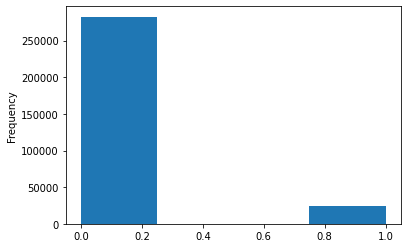

In [18]:
app_train['TARGET'].astype(int).plot.hist(bins=4)

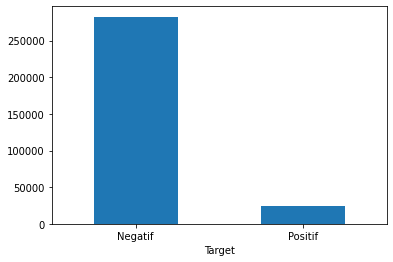

In [19]:
df_plot = pd.DataFrame({'Target':["Negatif", "Positif"], 'Value':[282686, 24823]})
df_plot.plot.bar(x='Target', y='Value', rot=0, legend=False)

In [20]:
# Function untuk menghitung nilai yang hilang dengan melihat kolom
def missing_values_table(df):
  # Jumlah nilai yang tidak ada
  mis_val = df.isnull().sum()

  # Persentasi nilai yang tidak ada
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Membuat tabel dengan hasil dari Jumlah dan Persentasi
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Mengubah nama kolom
  mis_val_table_ren_columns = mis_val_table.rename(
      columns = {0 : 'Missing Values', 1 : 'Persentasi dari Total Values(%)'})
        
  # Mengurutkan tabel dari persentasi descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Persentasi dari Total Values(%)', ascending=False).round(1)

  # Mencetak beberapa rangkuman informasi
  print("Your selected dataframe has "+str(df.shape[1]) + " columns.\n"
  "There are "+str(mis_val_table_ren_columns.shape[0])+ " columns that have missing values")

  return mis_val_table_ren_columns


In [21]:
# Statistik Nilai yang tidak ada
missing_values_train = missing_values_table(app_train)
missing_values_train.head(25)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,Persentasi dari Total Values(%)
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [22]:
missing_values_test = missing_values_table(app_test)
missing_values_test.head(25)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values


,Missing Values,Persentasi dari Total Values(%)
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [23]:
# Banyaknya unique classses di setiap obyek Kolom
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [24]:
# Membuat obyek label encoder
labelEncoder = LabelEncoder()
labelEncoder_count = 0

# Iterasi lewat kolom
for col in app_train:
  if app_train[col].dtype == 'object':
    # jika 2 atau kurang unique categories
    if len(list(app_train[col].unique())) <= 2:
      # Train data training
      labelEncoder.fit(app_train[col])
      # Transform training dan testing data
      app_train[col] = labelEncoder.transform(app_train[col])
      app_test[col] = labelEncoder.transform(app_test[col])

      # Tracking banyaknya kolom kena label encoded
      labelEncoder_count +=1

print('%d kolom yang label encoded. ' %labelEncoder_count)

3 kolom yang label encoded. 


In [25]:
# one-hot encoding untuk categorial variables
app_train = pd.get_dummies(app_train)
print('Training Features shape: ', app_train.shape)
app_train.head(20)

Training Features shape:  (307511, 243)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,0,1,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,1,0,1,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
app_test = pd.get_dummies(app_test)
print('Testing Features shape : ', app_test.shape)
app_test.head(20)

Testing Features shape :  (48744, 239)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
5,100042,0,1,1,0,270000.0,959688.0,34600.5,810000.0,0.025164,...,0,1,0,0,0,0,0,0,1,0
6,100057,0,1,1,2,180000.0,499221.0,22117.5,373500.0,0.022800,...,0,0,0,0,0,0,0,0,0,0
7,100065,0,0,1,0,166500.0,180000.0,14220.0,180000.0,0.005144,...,0,0,0,0,0,0,0,0,0,0
8,100066,0,0,1,0,315000.0,364896.0,28957.5,315000.0,0.046220,...,0,0,0,0,0,0,1,0,1,0
9,100067,0,1,1,1,162000.0,45000.0,5337.0,45000.0,0.018634,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train_label = app_train['TARGET']

# sejajarkan data training dan testing, keeping kolom yang ada dikedua dataframe
app_train, app_test = app_train.align(app_test, join='inner', axis = 1)

# Tambah kembali target
app_train['TARGET'] = train_label

print('Bentuk Training Features : ', app_train.shape)
print('Bentuk Testing Features : ', app_test.shape)
app_train

Bentuk Training Features :  (307511, 240)
Bentuk Testing Features :  (48744, 239)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,0,1,0,1,0,0
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,0,1,0,1,0,0
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,0,1,0,0,1,0,0
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,0,1,0,1,0,1


In [28]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

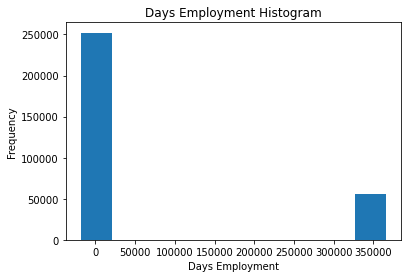

In [29]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [30]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.04620

In [31]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'DAYS_LAST_PHONE_CHANGE']]
ext_data_corrs = ext_data.corr()

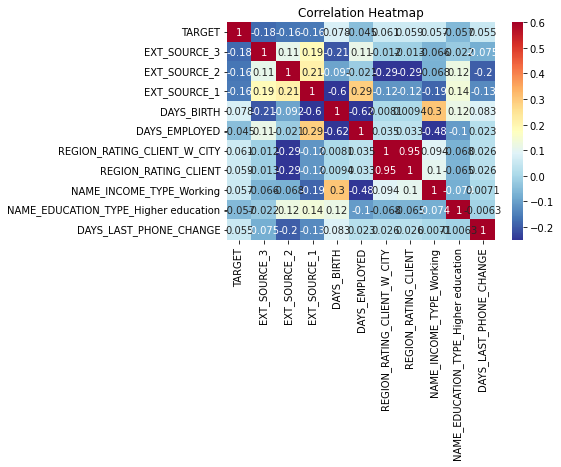

In [32]:
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [33]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']]
poly_features_test = app_test[['EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']]

In [34]:
anomaly = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anomaly = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anomaly['TARGET'].mean()))
print('Anomalies default on %0.2f%% of loans' % (100 * anomaly['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomaly))

The non-anomalies default on 8.66% of loans
Anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [35]:
# Drop target dari data training
trainY = app_train['TARGET']

if 'TARGET' in app_train:
  trainX = app_train.drop(columns = ['TARGET'])
else:
  trainX = app_train.copy()

# Feature name
features = list(trainX.columns)

# Mengopy data testing
test = app_test.copy()

# Median missing values dari nilai yang diduga missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Scale setiap fitur menjadi 0-1
scaler = MinMaxScaler(feature_range = (0,1))

# Menyesuaikan pada data training
imputer.fit(trainX)

# Transform data training dan testing
trainX = imputer.transform(trainX)
test = imputer.transform(app_test)

new_app_train = pd.DataFrame(data=trainX[:,:], columns=features[:])
new_app_train['TARGET'] = trainY

new_app_test = pd.DataFrame(data=test[:,:], columns=features[:])

print(trainX.shape)
print(trainY.shape)
print(new_app_train.shape)
missing_values = missing_values_table(new_app_train)

(307511, 239)
(307511,)
(307511, 240)
Your selected dataframe has 240 columns.
There are 0 columns that have missing values


In [46]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, 
                                                    test_size = 0.33,
                                                    random_state=seed)

In [47]:
missing_values = missing_values_table(pd.DataFrame(trainX))

Your selected dataframe has 239 columns.
There are 0 columns that have missing values


In [48]:
scalar = preprocessing.StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(scalar.transform(X_train))
y_train_norm = y_train.reset_index(drop=True)

In [39]:
# y_train = y_train_norm
# X_train = X_train_norm

In [40]:
pca = sklearnPCA(n_components = 2)
transformed = pd.DataFrame(pca.fit_transform(X_train_norm))
print(transformed.head())

          0         1
0 -3.405170  0.996015
1 -2.874438  0.624229
2  6.645697  1.276461
3 -0.166490  1.952562
4  1.899317  1.199482


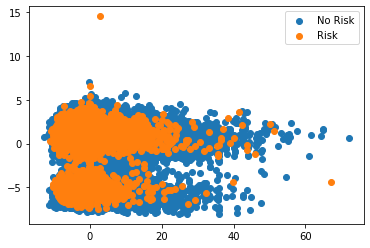

In [41]:
plt.scatter(transformed[y_train_norm==0][0], transformed[y_train_norm==0][1], label='No Risk')
plt.scatter(transformed[y_train_norm==1][0], transformed[y_train_norm==1][1], label='Risk')

plt.legend()
plt.show()

In [42]:
from sklearn.decomposition import FastICA
pca = FastICA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_train_norm))

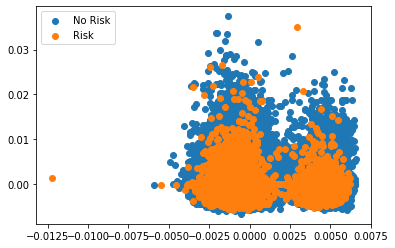

In [43]:
plt.scatter(transformed[y_train_norm==0][0], transformed[y_train_norm==0][1], label='No Risk')
plt.scatter(transformed[y_train_norm==1][0], transformed[y_train_norm==1][1], label='Risk')

plt.legend()
plt.show()

# Modelling

Training Cross Validation: 91.93 %
Test Accuraccy: 91.92 %
F1 Score: 0.00


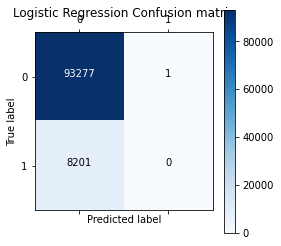

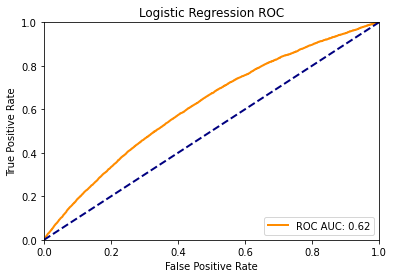

In [49]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = log_reg.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

#F1 Score
y_predicted = log_reg.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

# Confusion Matrix
log_reg_confusion = metrics.confusion_matrix(y_test, y_predicted)

plt.matshow(log_reg_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Logistic Regression Confusion matrix")
plt.colorbar()
thresh = log_reg_confusion.max() / 2.
for i, j in itertools.product(range(log_reg_confusion.shape[0]), range(log_reg_confusion.shape[1])):
    plt.text(j, i, log_reg_confusion[i, j],
    horizontalalignment="center",
    color="white" if log_reg_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

scores = log_reg.predict_proba(X_test)[:, 1]
    
# roc graph 
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 85.28 %
Test Accuraccy: 85.54 %
F1 Score: 0.15


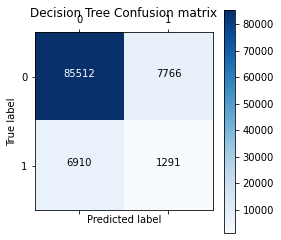

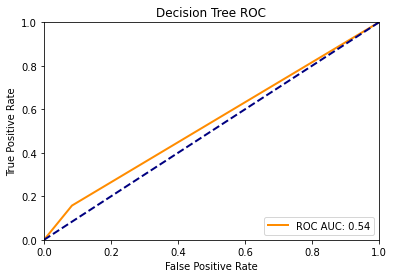

In [50]:
# train decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(dt, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = dt.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

#F1 Score
y_predicted = dt.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

# Confusion Matrix
dt_confusion = metrics.confusion_matrix(y_test, y_predicted)
#dt_confusion = dt_confusion.astype('float') / dt_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(dt_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Decision Tree Confusion matrix")
plt.colorbar()
thresh = dt_confusion.max() / 2.
for i, j in itertools.product(range(dt_confusion.shape[0]), range(dt_confusion.shape[1])):
    plt.text(j, i, dt_confusion[i, j],
    horizontalalignment="center",
    color="white" if dt_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
  
# roc graph 
scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 91.46 %
Test Accuraccy:  91.23858138136954 %
F1 Score:  0.012440297678551593


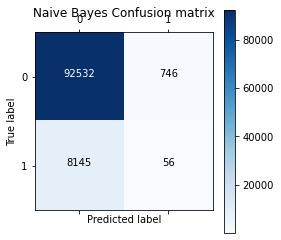

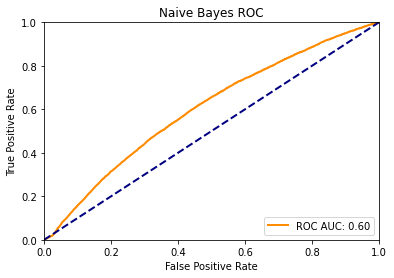

In [51]:
# train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(nb, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = nb.score(X_test, y_test)
print("Test Accuraccy: ", accuracy * 100, "%")

#F1 Score
y_predicted = nb.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
nb_confusion = metrics.confusion_matrix(y_test, y_predicted)
# nb_confusion = nb_confusion.astype('float') / nb_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(nb_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Naive Bayes Confusion matrix")
plt.colorbar()
thresh = nb_confusion.max() / 2.
for i, j in itertools.product(range(nb_confusion.shape[0]), range(nb_confusion.shape[1])):
    plt.text(j, i, nb_confusion[i, j],
    horizontalalignment="center",
    color="white" if nb_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc graph
scores = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()